In [2]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from summary_fn import *

In [3]:
# Unzip .sh files
# !sh unzip.sh

In [4]:
##??summary
#??count_na

In [5]:
!ls

EDA_v2.ipynb	sample_submission.csv	  songs.csv	 test.csv.7z
members.csv	sample_submission.csv.7z  songs.csv.7z	 train.csv
members.csv.7z	song_extra_info.csv	  summary_fn.py  train.csv.7z
__pycache__	song_extra_info.csv.7z	  test.csv


In [6]:
# Import data sets
train = pd.read_csv('train.csv')
member = pd.read_csv('members.csv')
songs = pd.read_csv('songs.csv')
extra_song = pd.read_csv('song_extra_info.csv')

In [7]:
#Data Exploration
#train data
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


#### We can see that train.csv has 6 columns and below is the data dictionary:
`msno`: user id unique to each use <br>
`song_id`: song id unique to each song <br>
`source_system_tab`: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.<br>
`source_screen_name`: name of the layout a user sees <br>
`source_type`: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc. <br>
`target`: this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise <br>

#### Let us get a summary count of the train data set 


In [8]:
summary(train)  # Custom function calll

Total number of records:  7377418
Distinct msno in dataframe: 30755
Distinct song_id in dataframe: 359966
Distinct source_system_tab in dataframe: 9
Distinct source_screen_name in dataframe: 21
Distinct source_type in dataframe: 13
Distinct target in dataframe: 2


From above summary we can see that we have more than **7 million** `events` with more than **30K** unique `users` and approx **360K** unique `songs`. We also have **9 distinct** `source system tabs`, **21** distinct `source screen name` and **13** `source type`.<br>
Let us check if the data is balanced of not:

In [9]:
np.mean(train.target)

0.5035170841614234

**So we can see that the data set is balanced.** Let us check if we have any missing values

In [10]:
count_na(train)  # Custom function call

,NA_count,Percentage
msno,0,0.000000
song_id,0,0.000000
source_system_tab,24849,0.336825
source_screen_name,414804,5.622618
source_type,21539,0.291959
target,0,0.000000


We can see that we have some values missing for `source system tab` , `source screen name` and `source type`. This implies that we will have to finds ways of missing these values before we start building models. <br>
Let us also check the number of observations we have for various levels for caregorical values:

In [11]:
def category_plots(counter,col_name):
    col_dict = counter[col_name]
    col_dict_df = pd.DataFrame.from_dict(col_dict,orient='index',columns=['counts'])
    col_dict_df.sort_values(by='counts',ascending=False).plot.bar()

Counter({'my library': 3684730, 'discover': 2179252, 'search': 623286, 'radio': 476701, 'listen with': 212266, 'explore': 167949, nan: 24849, 'notification': 6185, 'settings': 2200})


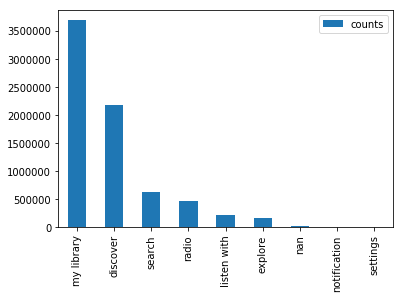

In [12]:
count_dict = data_category_counter(train)
source_system = count_dict['source_system_tab']
print(source_system)
category_plots(count_dict,'source_system_tab')


We can see that `my library` contributes to maximum of song events followed by `discover` and `search`. This is also looks intutive as we mostly use our libraruies to listen to songs. Let us explore the same relation with respect to the repeat percentage to see which `source system tab` contributes maximum to repeat events.

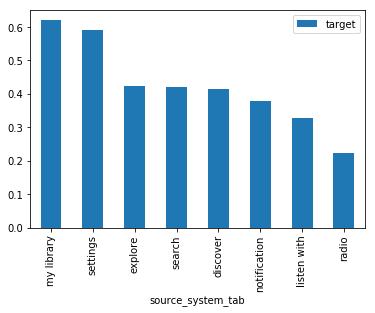

In [13]:
repeat_df = train.groupby(['source_system_tab']).mean().sort_values(by='target',ascending=False)
repeat_df.plot.bar()

As suspected `my library` has maxium repeat percentage followed by `settings`, `explore`, `serach` and `discover`. Note that `settings` and `explore` has less events yet have high conversions. Lets also check for `source screen name` and `source type`.

Counter({'Local playlist more': 3228202, 'Online playlist more': 1294689, 'Radio': 474467, 'Album more': 420156, nan: 414804, 'Search': 298487, 'Artist more': 252429, 'Discover Feature': 244246, 'Discover Chart': 213658, 'Others profile more': 201795, 'Discover Genre': 82202, 'My library': 75980, 'Explore': 72342, 'Unknown': 54170, 'Discover New': 15955, 'Search Trends': 13632, 'Search Home': 13482, 'My library_Search': 6451, 'Self profile more': 212, 'Concert': 47, 'Payment': 12})


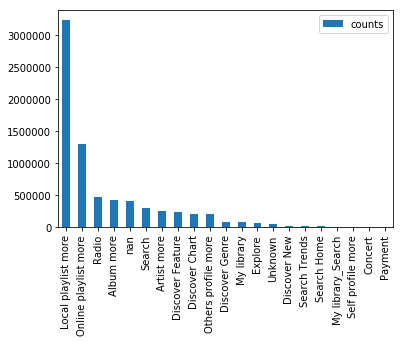

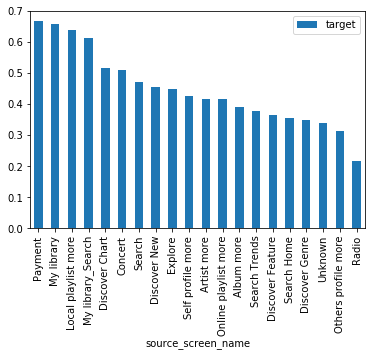

In [14]:
source_screen_name = count_dict['source_screen_name']
print(source_screen_name)
category_plots(count_dict,'source_screen_name')
repeat_df = train.groupby(['source_screen_name']).mean().sort_values(by='target',ascending=False)
repeat_df.plot.bar()

Similar to previous observation `Local playlist more` has high events and repear percentage. Same is true for `source type` as shown below:

Counter({'local-library': 2261399, 'online-playlist': 1967924, 'local-playlist': 1079503, 'radio': 483109, 'album': 477344, 'top-hits-for-artist': 423614, 'song': 244722, 'song-based-playlist': 210527, 'listen-with': 192842, nan: 21539, 'topic-article-playlist': 11194, 'artist': 3038, 'my-daily-playlist': 663})


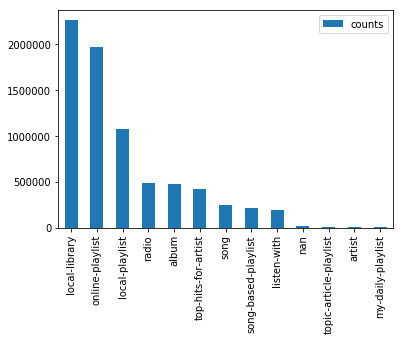

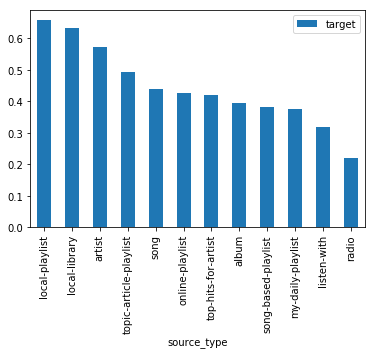

In [15]:
source_type = count_dict['source_type']
print(source_type)
category_plots(count_dict,'source_type')
repeat_df = train.groupby(['source_type']).mean().sort_values(by='target',ascending=False)
repeat_df.plot.bar()

#### Now lets find the song repeat counts and find most popular songs

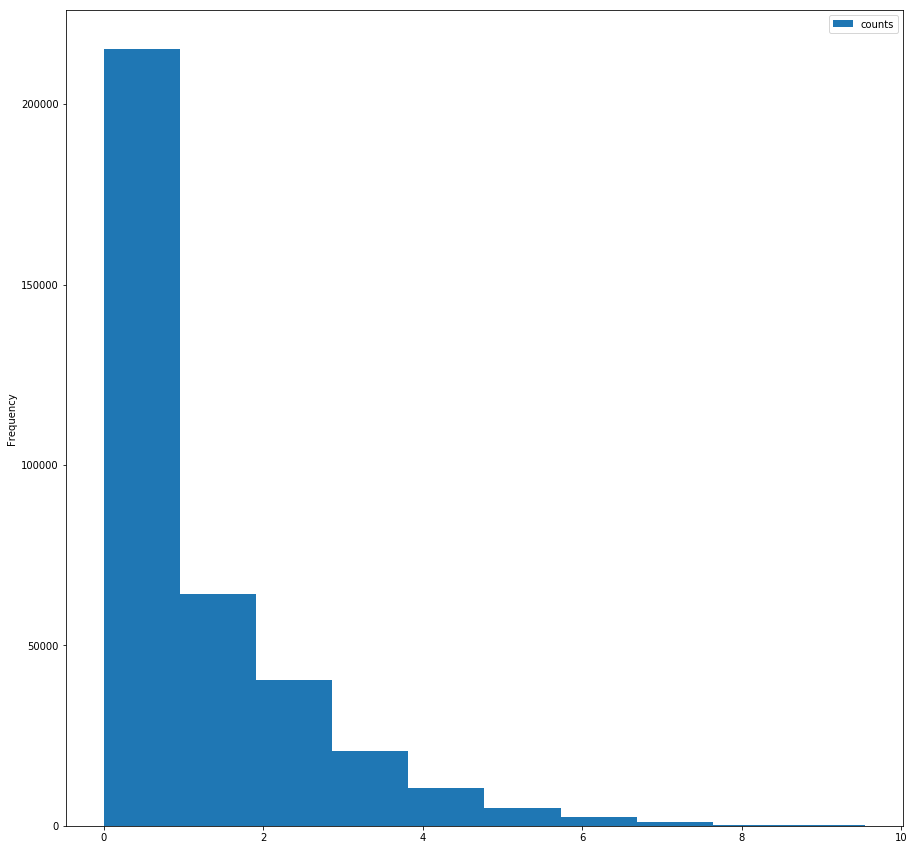

In [16]:
cong_count = song_play_times(train['song_id'])
cong_count_df = pd.DataFrame.from_dict(cong_count,orient='index',columns=['counts'])
np.log(cong_count_df).plot(kind='hist',figsize=(15,15))

We can see that most of the songs are repeated 1 times

In [17]:
#Analysing Member data set
member.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [18]:
# Converting registration_init_time and expiration_date to date format

In [19]:
member.registration_init_time = pd.to_datetime(member.registration_init_time.astype('str'))
member.expiration_date = pd.to_datetime(member.expiration_date.astype('str'))

In [20]:
member.dtypes

msno                              object
city                               int64
bd                                 int64
gender                            object
registered_via                     int64
registration_init_time    datetime64[ns]
expiration_date           datetime64[ns]
dtype: object

#### Member data has 7 columns. Here is the data dictionary for the same.
`msno`: Unique user id<br>
`city`: City <br>
`bd`: age. Note: this column has outlier values <br>
`gender` <br>
`registered_via`: registration method <br>
`registration_init_time`: format %Y%m%d <br>
`expiration_date`: format %Y%m%d <br>

#### Let us get a summary count of the Member data set 

In [21]:
summary(member)

Total number of records:  34403
Distinct msno in dataframe: 34403
Distinct city in dataframe: 21
Distinct bd in dataframe: 95
Distinct gender in dataframe: 3
Distinct registered_via in dataframe: 6
Distinct registration_init_time in dataframe: 3862
Distinct expiration_date in dataframe: 1484


From above summary we can see that we have approx **34K** users, **21** distinct cities, **6** registration methods.
#### Let us check numerical data summary

In [22]:
member.describe()

,city,bd,registered_via
count,34403.000000,34403.000000,34403.000000
mean,5.371276,12.280935,5.953376
std,6.243929,18.170251,2.287534
min,1.000000,-43.000000,3.000000
25%,1.000000,0.000000,4.000000
50%,1.000000,0.000000,7.000000
75%,10.000000,25.000000,9.000000
max,22.000000,1051.000000,16.000000


Note that `city`,`registration methods` have been numerically coded. Also note that we have a lot of outliers in age data which needs to be handled. Let us check the number of missing values in the data set.

In [23]:
count_na(member)

,NA_count,Percentage
msno,0,0.000000
city,0,0.000000
bd,0,0.000000
gender,19902,57.849606
registered_via,0,0.000000
registration_init_time,0,0.000000
expiration_date,0,0.000000


Note that we have **~58%** data is missing for gender column and we need to account for it.
#### Let us also check the number of observations we have for various levels for caregorical values:

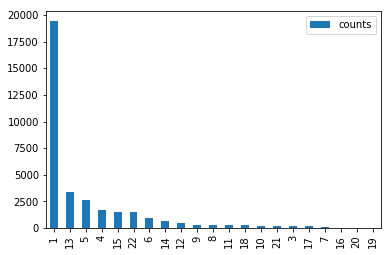

In [24]:
count_dict = data_category_counter(member)
category_plots(count_dict,'city')

We can see that city `1` constitutes majority of users followed by `13`.

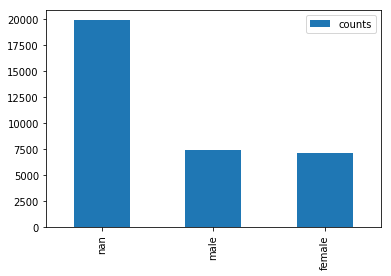

In [25]:
category_plots(count_dict,'gender')

We can see that majority of the members have not revelaed their gener. Also for the avialable data, the ratio of male and female is close to 1.

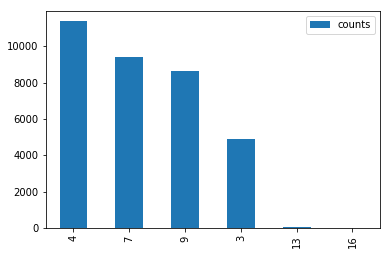

In [26]:
category_plots(count_dict,'registered_via')

We can see that `level 4` has maximum number of members followed by `level 7` and `level 9`.  

In [27]:
df = member.groupby(by='registration_init_time').count()


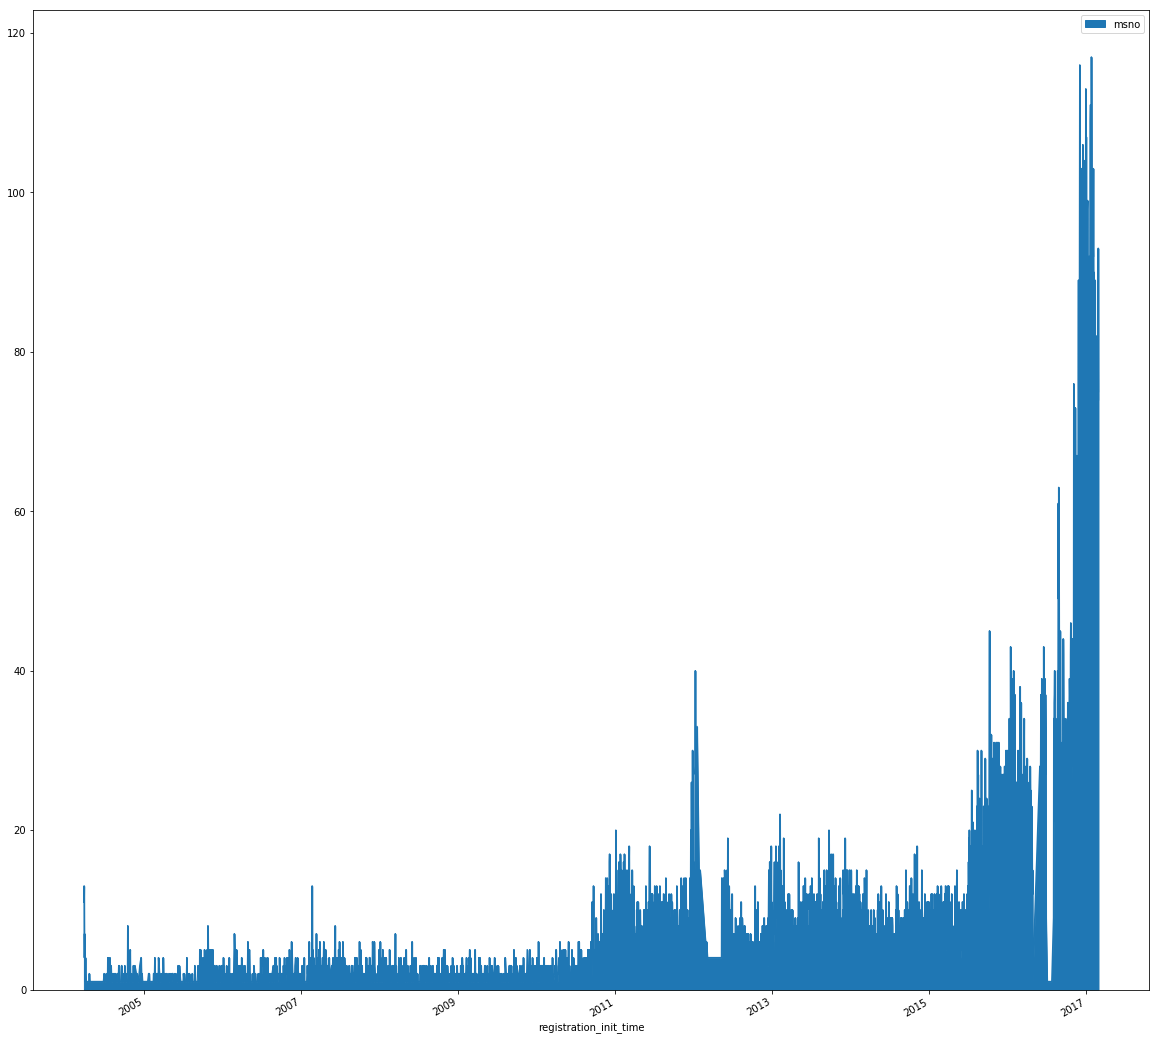

In [28]:
df[['msno']][1:].plot(kind='area',figsize=(20,20))

We can see that the registraion numbers have shot up in recent days with a lot of users registering in recent days.

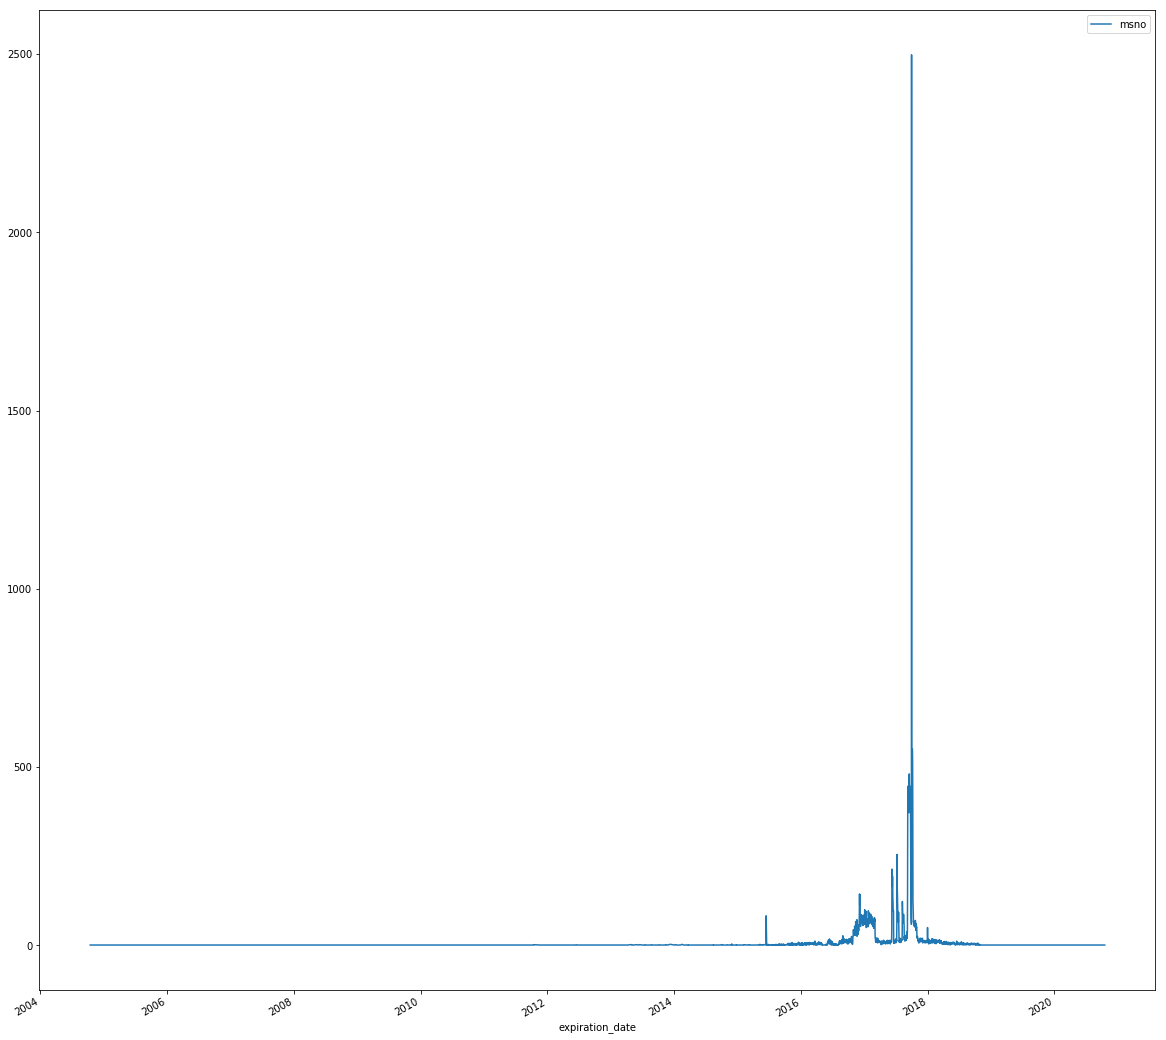

In [29]:
df = member.groupby(by='expiration_date').count()
df[['msno']][1:].plot(kind='line',figsize=(20,20))

Similarly the expiration date for maximum users is near the end.

In [30]:
time_to_expiration = (member.expiration_date - member.registration_init_time).astype('timedelta64[h]')/24
time_to_expiration.describe()

count    34403.000000
mean      1091.632474
std       1151.438441
min     -16191.000000
25%         72.000000
50%        701.000000
75%       1769.000000
max       5149.000000
dtype: float64

We can see that we have some outliers. Lets remove them and plot a histogram

(array([14385.,  5912.,  3923.,  2894.,  3856.,   958.,   720.,   866.,
          635.,   253.]),
 array([   0. ,  514.9, 1029.8, 1544.7, 2059.6, 2574.5, 3089.4, 3604.3,
        4119.2, 4634.1, 5149. ]),
 <a list of 10 Patch objects>)

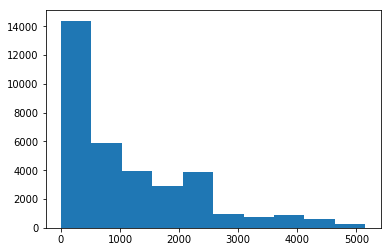

In [31]:
plt.hist(time_to_expiration[time_to_expiration>=0])

#### Lets explore the songs data set now

In [32]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


#### Songs data set has 7 columns and here is the data dictionary:
`song_id`<br>
`song_length`: in ms<br>
`genre_ids`:<br>
`genre category` Some songs have multiple genres and they are separated by | <br>
`artist_name` <br>
`composer` <br>
`lyricist` <br>
`language` <br>

In [33]:
summary(songs)

Total number of records:  2296320
Distinct song_id in dataframe: 2296320
Distinct song_length in dataframe: 146534
Distinct genre_ids in dataframe: 1046
Distinct artist_name in dataframe: 222363
Distinct composer in dataframe: 329824
Distinct lyricist in dataframe: 110926
Distinct language in dataframe: 11


We can see that we have approx **2.3 million** songs in **11** languages. Note unique gener_id,composer and artist names may be different as we have multiple names in same column.<br>
Lets check the `NA` values.

In [34]:
count_na(songs)

,NA_count,Percentage
song_id,0,0.000000
song_length,0,0.000000
genre_ids,94116,4.098558
artist_name,0,0.000000
composer,1071354,46.655257
lyricist,1945268,84.712409
language,1,0.000044


We can see that `composer` and `lyricist` has huge number of `NA's`. This makes the use of these columns really tricky.
#### Let check language count distribution

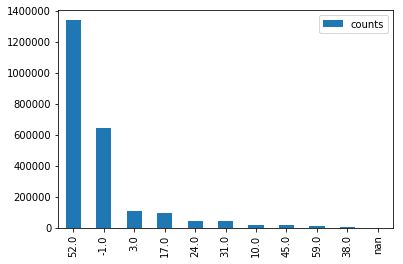

In [35]:
count_dict = data_category_counter(songs)
category_plots(count_dict,'language')

We can see that language `52` has most of the songs followed by `-1`. Lets check the histogram of `song lenght` to check its distribution.

count    2.296320e+06
mean     4.116558e+00
std      2.682000e+00
min      3.083333e-03
25%      3.060000e+00
50%      3.777117e+00
75%      4.621150e+00
max      2.028975e+02
Name: song_length, dtype: float64


(array([2.290211e+06, 4.514000e+03, 8.570000e+02, 5.740000e+02,
        6.900000e+01, 5.300000e+01, 2.300000e+01, 9.000000e+00,
        6.000000e+00, 4.000000e+00]),
 array([3.08333333e-03, 2.02925250e+01, 4.05819667e+01, 6.08714083e+01,
        8.11608500e+01, 1.01450292e+02, 1.21739733e+02, 1.42029175e+02,
        1.62318617e+02, 1.82608058e+02, 2.02897500e+02]),
 <a list of 10 Patch objects>)

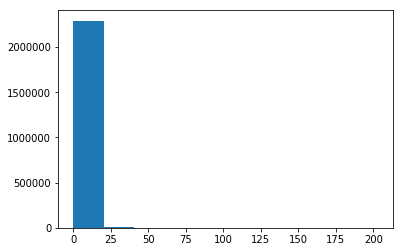

In [36]:
print((songs.song_length/60000).describe())
plt.hist(songs.song_length/60000)

We can see that most of the songs are below 10 min. There are few songs which are as long as 200 mins. 
#### Now lets find unique geners and songs distribution across geners

In [37]:
gener_count = genres_separate(songs.genre_ids)

In [38]:
len(gener_count)

191

So we have a total of **191 unique geners**. Lets plot a bar graph for most import geners

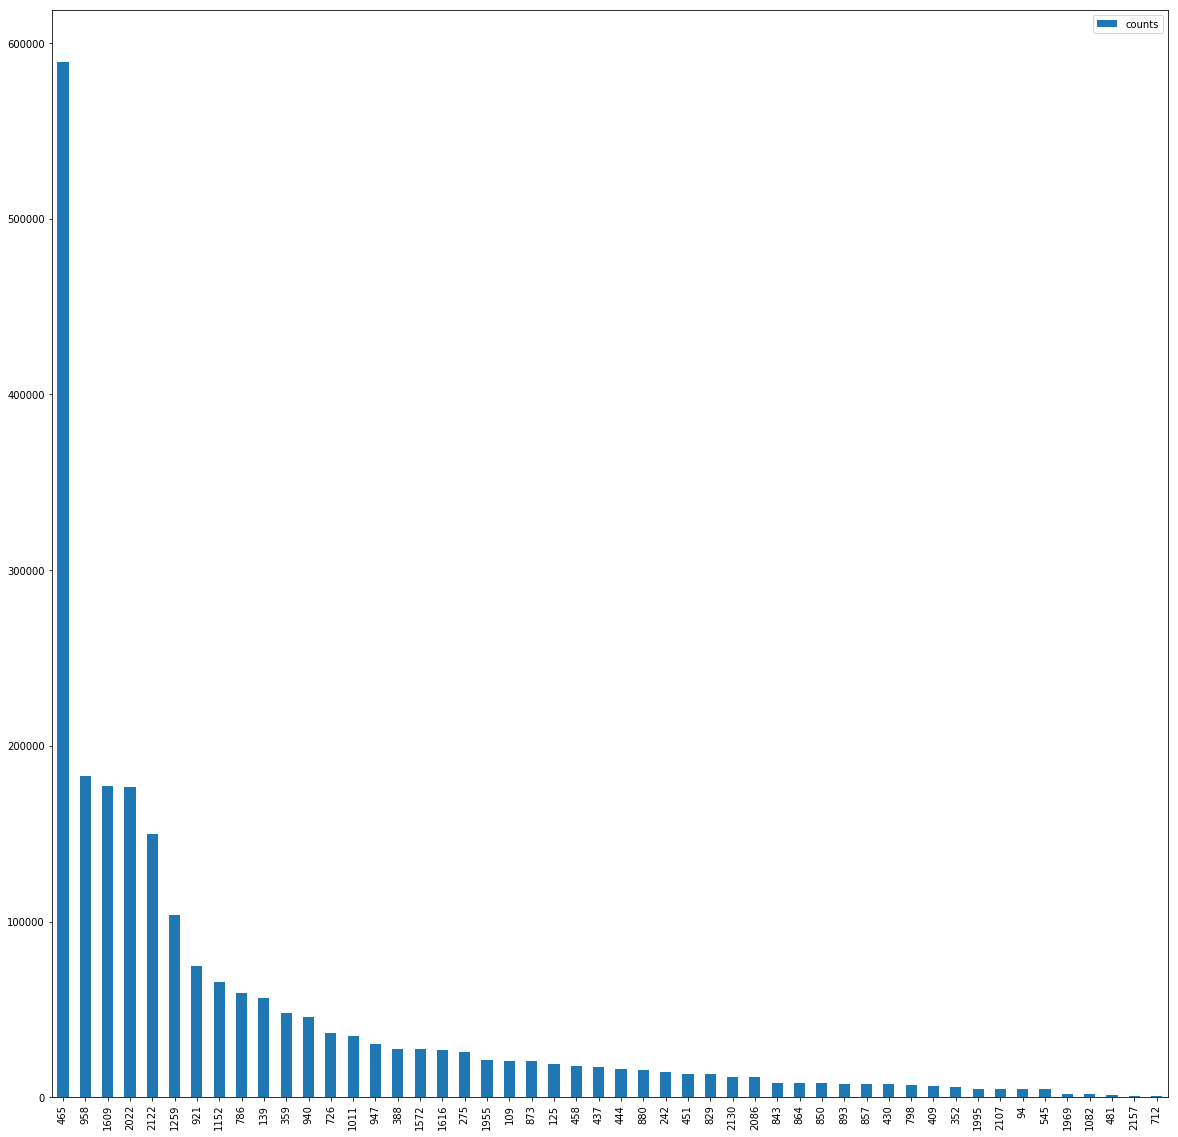

In [39]:
gener_df = pd.DataFrame.from_dict(gener_count,orient='index',columns=['counts'])
gener_df[0:50].sort_values(by='counts',ascending=False).plot(kind='bar',figsize=(20,20))

We can see that `465` has maximum songs followed by `958` and rest.

#### Lets explore extra song data set

In [40]:
extra_song.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


#### Extra_song data set has following columns:
`song_id` <br>
`song name` - the name of the song <br>
`isrc` - International Standard Recording Code, theoretically can be used as an identity of a song. However, what 
worth to note is, ISRCs generated from providers have not been officially verified; therefore the information in ISRC, such as country code and reference year, can be misleading/incorrect. Multiple songs could share one ISRC since a single recording could be re-published several times.

In [41]:
summary(extra_song)

Total number of records:  2295971
Distinct song_id in dataframe: 2295971
Distinct name in dataframe: 1168980
Distinct isrc in dataframe: 1806826


In [42]:
count_na(extra_song)

,NA_count,Percentage
song_id,0,0.000000
name,2,0.000087
isrc,136548,5.947288


We can see that **6%** of `isrc` column data are missing.
#### Let analyse test data set and compare it with training data set

In [43]:
test=pd.read_csv("test.csv")
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [44]:
summary(test)

Total number of records:  2556790
Distinct id in dataframe: 2556790
Distinct msno in dataframe: 25131
Distinct song_id in dataframe: 224753
Distinct source_system_tab in dataframe: 9
Distinct source_screen_name in dataframe: 23
Distinct source_type in dataframe: 13


We can see that we have **2.55 millions** data items to predict. 
#### Let see how different is test data from train data in terms of items:

In [45]:
test_train_diff(train,test)

{'msno': 3648,
 'source_screen_name': 2,
 'source_type': 0,
 'song_id': 59873,
 'source_system_tab': 0}

So we can see that we have **3648** new  `msno` which were not present in training data. We also have **2** new `source_screen_name` and **59873** new songs.